In [1]:
import numpy as np
from numpy import sin, cos, pi
import matplotlib.pyplot as plt
import ibsen
from ibsen import Orbit, Winds

DAY = 86400.
AU = 1.5e13

In [2]:
sys_name = 'psrb' 
orb = Orbit(sys_name = sys_name, n=1003)

Now, let us initialize the winds with the class ``winds:Winds``. Quick remark: Apart from outflows-related stuff, I temporarily put everything related to the properties of an NS (P, meaning ''pulsar'') and an optical star (S, meaning ''Star'') in this class: so temperature/radius of S, magnetic fields as functions of r --- are all initialized/calculated here.  

## Outflows

### Pulsar wind
Anyway, to the optflows. For the pulsar relativistic wind pressure, I use this dimentionless expression:
$$P_p = f_p \left(\frac{R_\mathrm{opt}}{r_\mathrm{from~P}}\right)^2.$$
$f_p=0.1$ is default.

### Optical star spherical wind and decretion disk
The optical star has two types of them: the polar spherically-symmetrical wind and the axially-symmetrical thin outflow, a decretion disk. Their pressures are introduced in a dimensionless fashion:
$$P_w = \left(\frac{R_\mathrm{opt}}{r_\mathrm{from~S}}\right)^2, $$
$$P_d = f_d \left(\frac{R_\mathrm{opt}}{\rho}\right)^{n_P} \exp{\left(-\frac{1}{2}\left(\frac{r_{\perp}}{H(\rho)}\right)^2\right)} $$
The default values are: $f_d=0, n_P=3$.

Here I use the following notation. If $r$ is the distance from S to a given point in space, then $\rho$ is its projection onto the disk, and $r_\perp$ is the perpendicular from the disk to this point. $n_P$ is a disk radial exponent. You can also specify the alternative ''radial'' dependence in form of a broken power law (the norm is chosen so that it it continious in $\rho=r_\mathrm{trunk}$):
\begin{equation}
\begin{cases}
\propto \rho^{-n_P}, & \rho < r_\mathrm{trunk}\\
\propto \rho^{-2},  & \rho >= r_\mathrm{trunk}.
\end{cases}
\end{equation}

The ''vertical'' part is, as you can see, a Gaussian with the width of the height of the disk. This height is defined as
$$H(r)/r = \delta \left(\frac{\rho}{R_\mathrm{opt}}\right)^{\mathrm{height\_exp}}$$
The default values are: $\delta=0.01, \mathrm{height\_exp}=0.5.$

To calculate the $\rho$ and $r_\perp$ you have to know the orientation of the disk in space relative to the pulsar orbit. I define the disk plane by its normal vector $\mathbf{n}_{\rm disk}$ which I obtain by rotating the normal to the pulsar plane $\mathbf{n}_{\rm orb} = (0, 0, 1)^T$. First, (1) incline it at the angle $i$ to the direction of periastron and then (2) rotate it around the normal $\mathbf{n}_{\rm orb}$  at the angle $\alpha$. The default values are $i=30^\circ, \alpha = 0^\circ$.

Here you can also calculate the distance at which $P_w + P_d = P_p$ and calculate the effective relation between winds momenta at the moment of time after the periastron passage $t$.
### Note about time-dependent outflows
The proper time-dependent winds behavior is curently not supported which means that the `Winds` class, once initialized, stays the same, but you can manually make the pressure and the height of the disk time-dependent in the sense that the initialization values of $f_d$ and $\delta$ will depend on another parameter, `t_forwinds`. These two qualities can either instantly change at some time, or grow linearly over a time span. It is controlled by `p_enh` and `p_enh_times`, `h_enh` and `h_enh_times`. 
 If:
 ```python
    DAY = 86400.
    p_enh = [2, [2, 3], 5]
    p_enh_times = [-3*DAY, [0, 5*DAY], 't2']  
 ```
  then the pressure parameter $f_d$ will increase instantly 2 times $f_d \rightarrow 2\,f_d$ at -3 days; then linearly $2f_d \rightarrow 3 \,f_d$  from 0 days to 5 days, then $\rightarrow 5\, f_d$ at the moment of the second disk passage. The same works with height, where $\delta$ increases. For now, the array (p/h)_enh_times should be sorted in ascending order, even if you use keywords \'t1\`, \'t2\`.

``Winds`` have the parameter `t_forwinds`, which, if passed, tells the class the time at which to take the values of $f_d$ and $\delta$.

## Magnetic fields
Currently, all information about the stars is stored in ``winds:Winds``. In this class, there are their magnetic fields and functions for calculating them at some distance and at the shock apex (at time $t$) and the same for the photon field of the optical star.

For magnetic fields, you have to specify the model (`linear`, `dipolar`, or `from_L_sigma` for pulsar field; `linear` or `dipolar` for the optical star). If the model is `linear` or `dipole`, the field is calculated as 
\begin{equation}
    B(r) = B_\mathrm{ref} \left(\frac{r_\mathrm{ref}}{r}\right)^\mathrm{1~or~3},
\end{equation}
and you have to specify $B_\mathrm{ref} $ and $r_\mathrm{ref}$; OR you can specify $B_\mathrm{apex}$, and then $r_\mathrm{ref}$ will be computed as the distance to the IBS apex in the IBS class, when the fields are assigned to IBS.

You can also use the model `from_L_sigma` for the pulsar field, then 
\begin{equation}
    \sqrt{\frac{L_\mathrm{spindown}\,\, \sigma_\mathrm{magn}}{c\,\, r_\mathrm{to~p}}},
\end{equation}
and you have to either specify $L, \sigma$ OR again the apex field (then the behavior is like in `linear` model).

In future maybe it worth making two classes: ``pulsar`` (which would contain everything about the outflows and magn fields of the pulsar)  and ``opt_star`` (same for the optical star) and then we can omit the class ``winds`` at all, as ``ibs`` (see further) could accept ``pulsar`` and ``opt_star`` as arguments, calculating the position of $r_{\rm apex}$.


disk equator passage times [days]:
-12.861370702230648 20.93134755958644
r_se / r_sp (10 days)
0.759757259098525
beta_eff (5 days, 20 days, 40 days)
0.10000000000000021
0.019859982028057638
0.09249077961183932


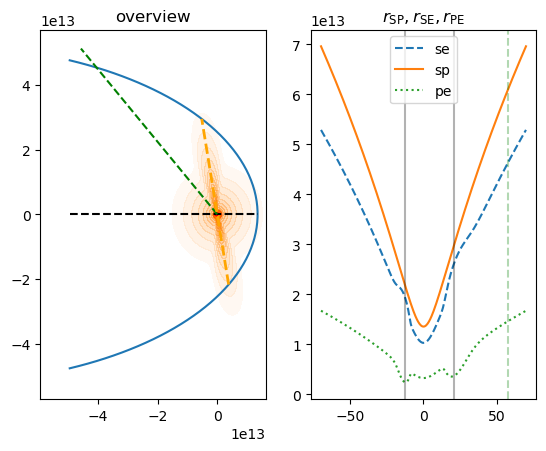

In [3]:
plt.close('all')
winds = Winds(orbit=orb, sys_name = sys_name, alpha=10/180*pi, incl=23*pi/180,
              f_d=165, f_p=0.1, delta=0.02, np_disk=3, rad_prof='pl', r_trunk=None,
             height_exp=0.25, 
             ns_b_ref=1, ns_r_ref=1e13, # these mean that the NS field at r=1e13 cm = 1G
             opt_b_ref=3, opt_r_ref=1e13, # same for the opt. star
             )
winds.peek(showtime=(-70*DAY, 70*DAY))

t1, t2 = winds.times_of_disk_passage
print('disk equator passage times [days]:')
print(t1/DAY, t2/DAY)
vec_disk1, vec_disk2 = winds.vectors_of_disk_passage
print('r_se / r_sp (10 days)')
print(winds.dist_se_1d(t = 10 * DAY) / orb.r(t = 10 * DAY)) # the disnace S-to-E (the point where the pressures of opt. star
                                                            # outflows are equal to the pulsar pressure) at 10 days (in units of r_sp)
print('beta_eff (5 days, 20 days, 40 days)')
print(winds.beta_eff(t = 5 * DAY)) # effective beta at t=5 days, it's close to f_p, as we are mostly in the polar wind
print(winds.beta_eff(t = 20 * DAY)) # effective beta at t=20 days, it's << f_p, as we are in the disk
print(winds.beta_eff(t = 40 * DAY)) # effective beta at t=40 days, again is close to f_p, as we have already left the disk

Text(0, 0.5, '$B^2$, G$^2$')

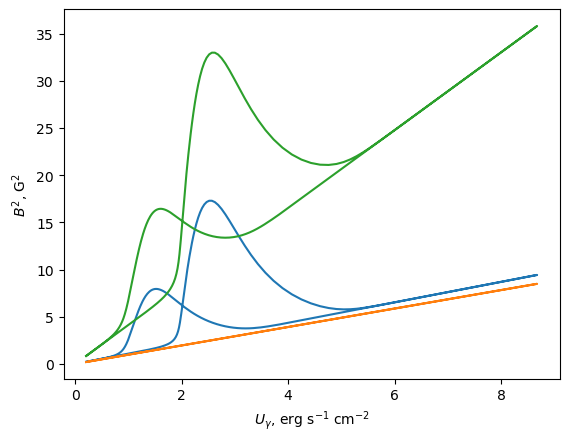

In [4]:
"""
Let's plot how the magnetic field squared depends on the photon energy density:
Maybe, in a way, it is a measure of how the X-rays are correlated with TeVs...
"""
plt.close('all')
# fig, ax = plt.subplots(ncols=3)

t = np.linspace(-100*DAY, 100*DAY, 1000)
B_ns, B_opt = winds.magn_fields_apex(t)
ug = winds.u_g_density_apex(t)
plt.plot(ug, B_ns**2, label  = 'NS field')
plt.plot(ug, B_opt**2, label  = 'Opt star field')
plt.plot(ug, (B_ns+B_opt)**2, label  = 'Total field')
plt.xlabel(r'$U_\gamma$, erg s$^{-1}$ cm$^{-2}$')
plt.ylabel(r'$B^2$, G$^2$')


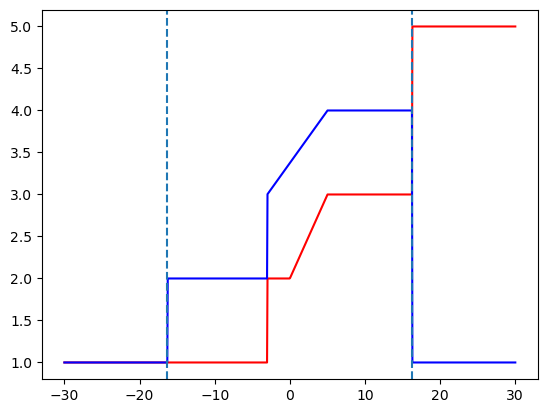

In [5]:
"""
An illustration to how p/h_enh work.
"""
plt.close('all')
f_d_0 = 10
delta_0 = 0.01
p_enh = [2, [2, 3], 5]
p_enh_times = [-3*DAY, [0, 5*DAY], 't2']
h_enh = [2, [3, 4], 1]
h_enh_times = ['t1', [-3*DAY, 5*DAY], 't2']
ts = np.linspace(-30, 30, 1000) * DAY
fs = []
deltas = []
for t_forwinds in ts:
    _winds = Winds(orbit=orb, sys_name = sys_name, 
              f_d=f_d_0, delta=delta_0, 
            p_enh = p_enh,
            p_enh_times = p_enh_times,
            h_enh = h_enh,
            h_enh_times = h_enh_times,  
                   t_forwinds=t_forwinds
             )
    fs.append(_winds.f_d/f_d_0)
    deltas.append(_winds.delta/delta_0)

plt.plot(ts/DAY, fs, color='r', label = r'$\delta(t)/\delta_0$')
plt.plot(ts/DAY, deltas, color='b', label = r'$f_d(t)/f_{d0}$')
plt.axvline(x=_winds.t1_pass/DAY, ls='--')
plt.axvline(x=_winds.t2_pass/DAY, ls='--')


plt.show()